In [ ]:
import gcp.storage as storage

# Orders

In [5]:
%%sql --module orders_by_timeofday_slot
SELECT FIRST(timeofday_slot), COUNT(*) AS num_orders FROM [datalab-projects-1331:xjk_algo_comp.orders]
GROUP BY timeofday_slot
ORDER BY timeofday_slot

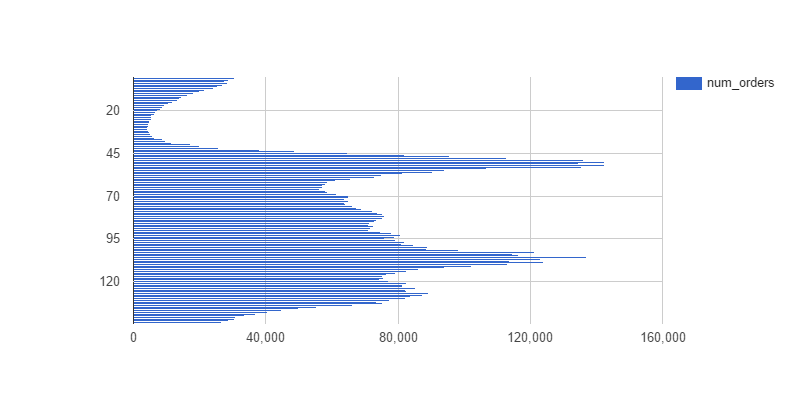

In [6]:
%%chart bars --data orders_by_timeofday_slot
height: 400
vAxis:
  direction: -1

# Gaps

In [3]:
%%sql --module gaps_by_timeofday_slot
SELECT timeofday_slot, SUM(gap) AS gap FROM [datalab-projects-1331:xjk_algo_comp.gaps]
GROUP BY timeofday_slot

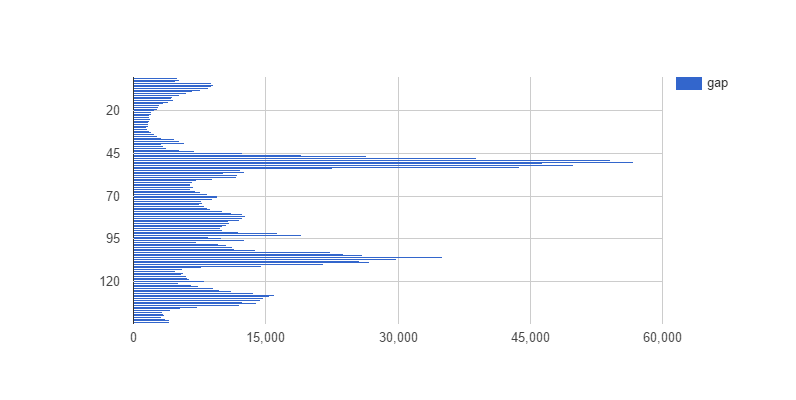

In [4]:
%%chart bars --data gaps_by_timeofday_slot
height: 400
vAxis:
  direction: -1